In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [2]:
df = pd.read_csv(os.path.join("weatherAUS_feature_engineer.csv"))
df.head(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,rain_today_b,rain_tomorrow_b,temp_change_9to3,temp_change_min_max,humidity_change,humidity_change_percent,pressure_change,wind_change_direction,wind_gust_change_3,wind_gust_change_9
0,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,...,False,False,6.8,17.3,7.0,0.350000,1.9,False,True,True
1,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,...,False,False,6.7,10.5,22.0,0.733333,0.8,True,True,True
2,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,...,False,False,6.2,18.2,20.0,0.476190,3.1,False,True,False
3,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,...,False,False,6.5,16.5,15.0,0.405405,3.6,False,True,False
4,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,...,False,False,4.0,16.8,4.0,0.210526,3.3,False,False,True
5,27.1,36.1,0.0,13.0,0.0,43.0,7.0,20.0,26.0,19.0,...,False,False,3.6,9.0,7.0,0.269231,0.3,False,True,False
6,23.3,34.0,0.0,9.8,12.6,41.0,17.0,19.0,33.0,15.0,...,False,False,6.5,10.7,18.0,0.545455,1.4,False,True,True
7,16.1,34.2,0.0,14.6,13.2,37.0,15.0,6.0,25.0,9.0,...,False,False,12.1,18.1,16.0,0.640000,4.1,False,True,False
8,19.0,35.5,0.0,12.0,12.3,48.0,30.0,9.0,46.0,28.0,...,False,False,9.9,16.5,18.0,0.391304,4.3,False,True,False
9,19.7,35.5,0.0,11.0,12.7,41.0,15.0,17.0,61.0,14.0,...,False,False,9.6,15.8,47.0,0.770492,2.1,False,True,True


In [3]:
list(df.columns)

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'rain_today_b',
 'rain_tomorrow_b',
 'temp_change_9to3',
 'temp_change_min_max',
 'humidity_change',
 'humidity_change_percent',
 'pressure_change',
 'wind_change_direction',
 'wind_gust_change_3',
 'wind_gust_change_9']

In [4]:
y = df["rain_tomorrow_b"]

target_names = ["False", "True"]

In [5]:
X = df.drop("rain_tomorrow_b", axis=1)
X.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Temp3pm,rain_today_b,temp_change_9to3,temp_change_min_max,humidity_change,humidity_change_percent,pressure_change,wind_change_direction,wind_gust_change_3,wind_gust_change_9
0,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,...,33.4,False,6.8,17.3,7.0,0.350000,1.9,False,True,True
1,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,...,27.0,False,6.7,10.5,22.0,0.733333,0.8,True,True,True
2,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,...,34.9,False,6.2,18.2,20.0,0.476190,3.1,False,True,False
3,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,...,35.6,False,6.5,16.5,15.0,0.405405,3.6,False,True,False
4,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,...,37.6,False,4.0,16.8,4.0,0.210526,3.3,False,False,True


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=42)

k: 1, Train/Test Score: 1.000/0.807
k: 3, Train/Test Score: 0.905/0.831
k: 5, Train/Test Score: 0.886/0.841
k: 7, Train/Test Score: 0.877/0.846
k: 9, Train/Test Score: 0.872/0.847
k: 11, Train/Test Score: 0.870/0.848
k: 13, Train/Test Score: 0.868/0.850
k: 15, Train/Test Score: 0.866/0.849
k: 17, Train/Test Score: 0.865/0.849
k: 19, Train/Test Score: 0.864/0.850
k: 21, Train/Test Score: 0.863/0.849
k: 23, Train/Test Score: 0.862/0.849
k: 25, Train/Test Score: 0.861/0.849
k: 27, Train/Test Score: 0.861/0.850
k: 29, Train/Test Score: 0.861/0.851
k: 31, Train/Test Score: 0.860/0.851
k: 33, Train/Test Score: 0.860/0.850
k: 35, Train/Test Score: 0.860/0.850
k: 37, Train/Test Score: 0.859/0.850
k: 39, Train/Test Score: 0.859/0.850


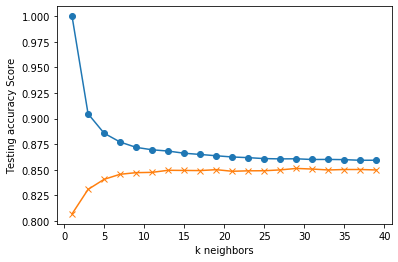

In [7]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [8]:
# Choose the best k from above and re-fit the KNN Classifier using that k value.
# print the score for the test data
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)
print('k=30 Test Acc: %.3f' % knn.score(X_test, y_test))

k=30 Test Acc: 0.850


## Save the model

In [9]:
import joblib

file = 'KNN.sav'
joblib.dump(knn, file)

['KNN.sav']